# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

- 1. Изучение общей информаци по данным
- 2. Предобработка данных
- 3. Добавление в таблицу новых столбцов
- 4. Исследовательский анализ данных
- 5. Общий вывод

### Откройте файл с данными и изучите общую информацию

In [ ]:
# Импорт библиотеки pandas
import pandas as pd

In [ ]:
# загрузим данные
try:
    # попытка прочитать файл из Drive Google
    path = '/content/drive/MyDrive/Colab Notebooks/Обучение/Яндекс Практикум/Аналитик данных (расширенный)/Dataset/'
    data = pd.read_csv(path + 'real_estate_data.csv', sep='\t')
except FileNotFoundError:
    # если файл не найден, загрузка из URL
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# Вывод первых 20 строк датафрейма
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
# Вывод основной информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

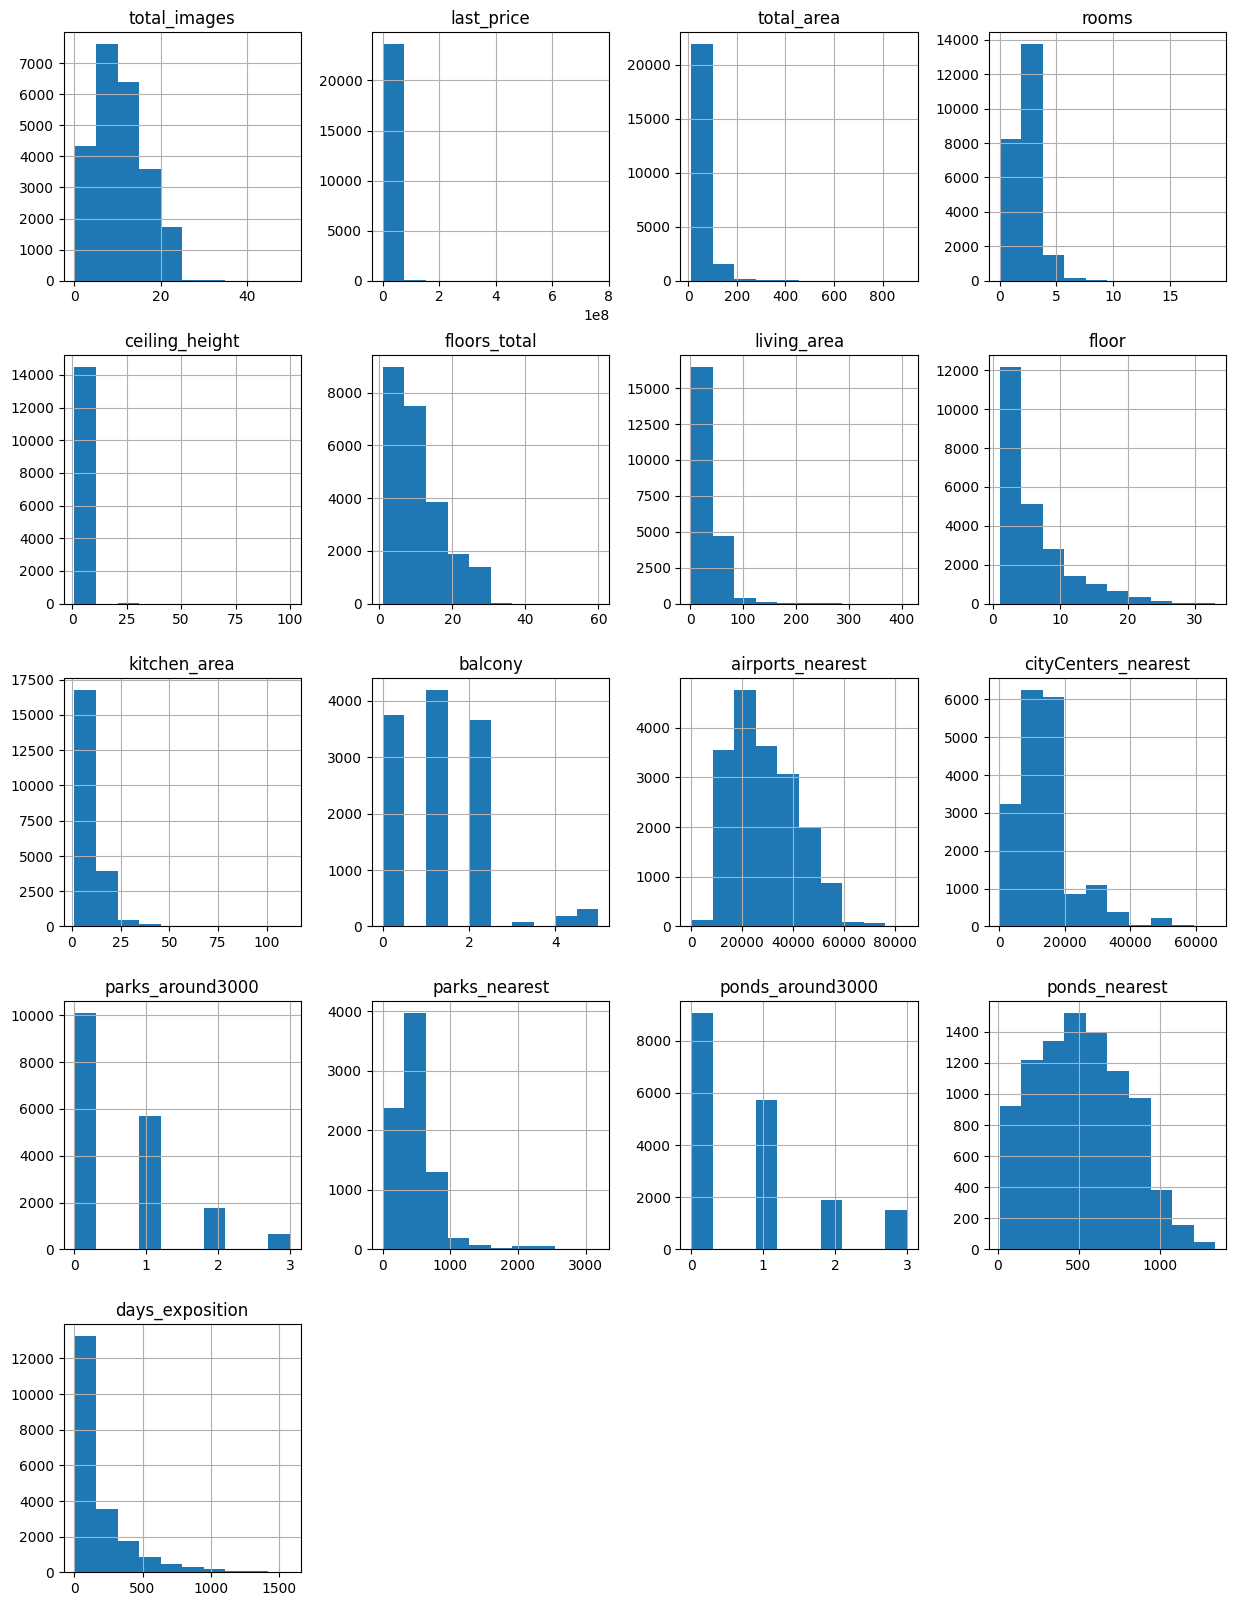

In [ ]:
# Построение гистограмм для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))

В столбцах 'floors_total', 'balcony', 'first_day_exposition' и 'is_apartment' не верно указаны типы данных. Обнаружены во многих столбцах пропуски, а также неявные дубликаты в 'locality_name'. По графикам наблюдаются выбивающиеся значения и аномалии в большинстве столбцах.

### Выполните предобработку данных

In [ ]:
# Подсчет количества пропущенных значений для каждого столбца
missing_values = data.isnull().sum()
missing_values.sort_values(ascending=False)

,0
is_apartment,20924
parks_nearest,15620
ponds_nearest,14589
balcony,11519
ceiling_height,9195
airports_nearest,5542
cityCenters_nearest,5519
ponds_around3000,5518
parks_around3000,5518
days_exposition,3181


In [ ]:
# Замена пропусков в столбце 'ceiling_height' медианными значениями по 'total_area'
for ceiling in data['total_area'].unique():
    data.loc[(data['total_area'] == ceiling) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['total_area'] == ceiling), 'ceiling_height'].median()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [ ]:
# Замена пропусков в столбце 'floors_total' медианными значениями по 'floor'
for floors in data['floor'].unique():
    data.loc[(data['floor'] == floors) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['floor'] == floors), 'floors_total'].median()

In [ ]:
# Замена пропусков в столбце 'living_area' медианными значениями по 'total_area'
for area in data['total_area'].unique():
    data.loc[(data['total_area'] == area) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == area), 'living_area'].median()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [ ]:
# Замена пропусков в столбце 'is_apartment' на 'False'
data['is_apartment'] = data['is_apartment'].fillna(False)

In [ ]:
# Замена пропусков в столбце 'kitchen_area' медианными значениями по 'total_area'
for area in data['total_area'].unique():
    data.loc[(data['total_area'] == area) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area'] == area), 'kitchen_area'].median()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [ ]:
# Замена пропусков в столбце 'balcony' на '0'
data['balcony'] = data['balcony'].fillna(0)

Пропуски были обнаружены в следующих столбцах:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

Основными причинами пропусков являются человеческий фактор (пользователь не указал данные) и техническая ошибка (например потеря данных при выгрузке).

В столбце 'is_apartment' пропуски были заменены на 'False' - т.к. пропущенные значения можно интерпритировать как отрицательный ответ, аналогично в столбце 'balcony' пропуски заменены на '0'. В остальных столбцах пропуски по возможности заменены медианным значением.

In [ ]:
# Замена вещественного типа данных на целочисленный
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)

In [ ]:
# Замена типа данных в столбце 'first_day_exposition' на 'datetime64'
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64[ns]')

In [ ]:
# Замена типа данных в столбце 'is_apartment' на булев тип
data['is_apartment'] = data['is_apartment'].astype(bool)

В столбцах 'floors_total' и 'balcony' тип данных был заменен на целочисленный, т.к. количество этажей или балконов может быть только целым числом. В столбце 'first_day_exposition' тип данных заменен на datetime64, потому что данный столбец содержит дату и время. Столбец 'is_apartment' содержит значения true и false, а это булев тип данных.

In [ ]:
# Вывод переченя уникальных значений столбца 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
# Устранение неявных дубликатов в столбце 'locality_name'
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', 'коттеджный поселок'], 'поселок', regex=True)
)

### Добавьте в таблицу новые столбцы

In [ ]:
# Добавление нового столбца с ценой одного квадратного метра
data['square_price'] = (data['last_price'] / data['total_area']).round(2)

In [ ]:
# Добавление нового столбца с указанием дня недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [ ]:
# Добавление нового столбца с указанием месяца публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

In [ ]:
# Добавление нового столбца с указанием года публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [ ]:
# Функция для определения типа этажа
def floor_types(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Добавление нового столбца с типом этажа
data['floor_type'] = data.apply(floor_types, axis=1)

In [ ]:
# Добавление нового столбца с расстоянием до центра города в километрах
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round()

In [ ]:
# Вывод первых 20 строк датафрейма
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.700,11,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.600,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,3.140,14,95.00,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.520,12,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.650,26,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.775,24,44.30,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.500,9,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


### Проведите исследовательский анализ данных

In [ ]:
# Подсчет количества значений в каждом столбце
data.count()

,0
total_images,23699
last_price,23699
total_area,23699
first_day_exposition,23699
rooms,23699
ceiling_height,23072
floors_total,23699
living_area,23556
floor,23699
is_apartment,23699


In [ ]:
# Столбцы для обработки
columns_to_process = ['ceiling_height', 'total_area', 'living_area', 'kitchen_area', 'last_price',
                      'rooms', 'floors_total', 'cityCenters_nearest', 'parks_nearest']

# Функция для удаления выбросов по методу IQR
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Удаление выбросов для каждого столбца
for column in columns_to_process:
    data[column] = remove_outliers(data[column])

In [ ]:
# Подсчет количества значений в каждом столбце
data.count()

,0
total_images,23699
last_price,21665
total_area,22459
first_day_exposition,23699
rooms,23609
ceiling_height,21409
floors_total,23667
living_area,22723
floor,23699
is_apartment,23699


In [ ]:
# Импорт библиотеки matplotlib
import matplotlib.pyplot as plt

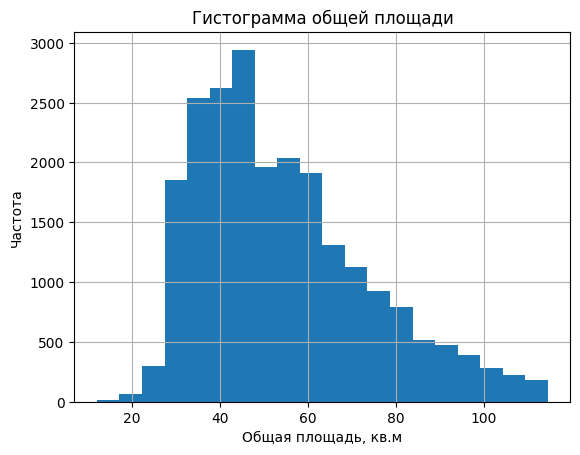

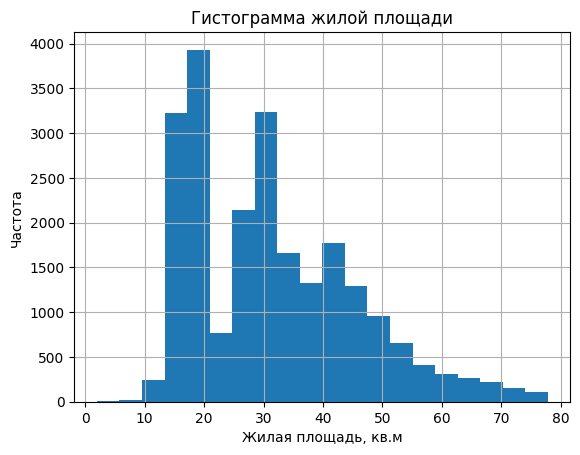

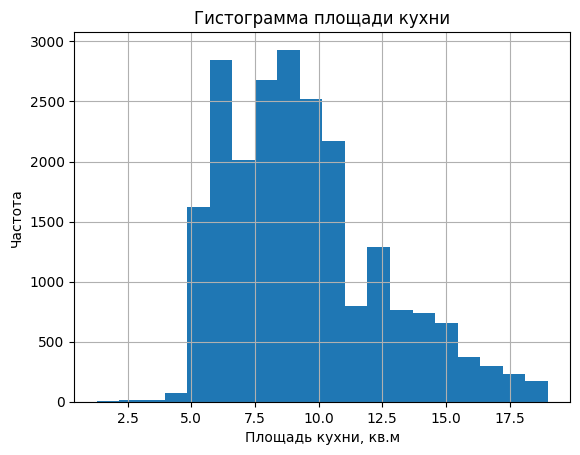

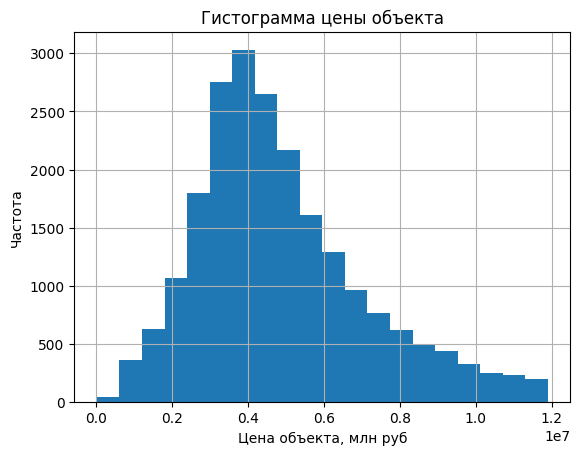

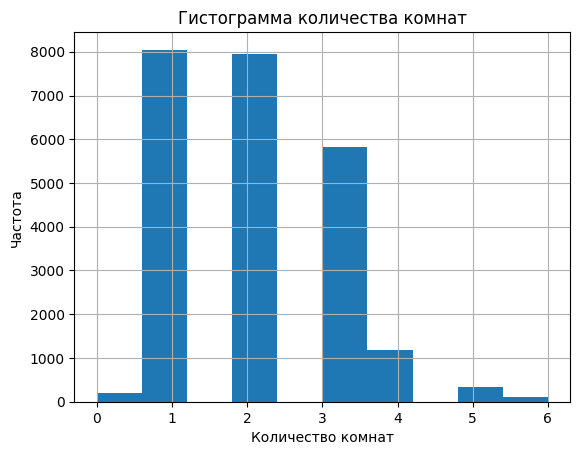

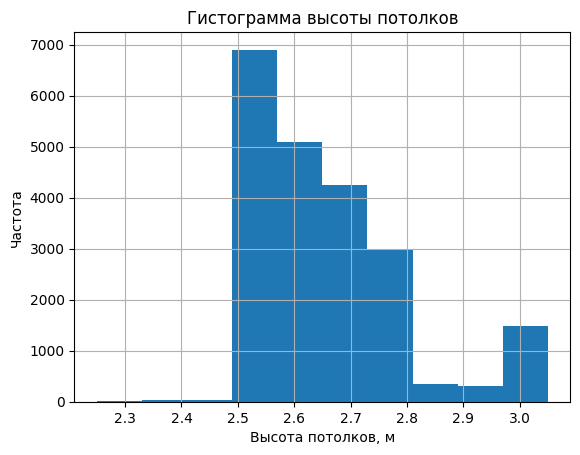

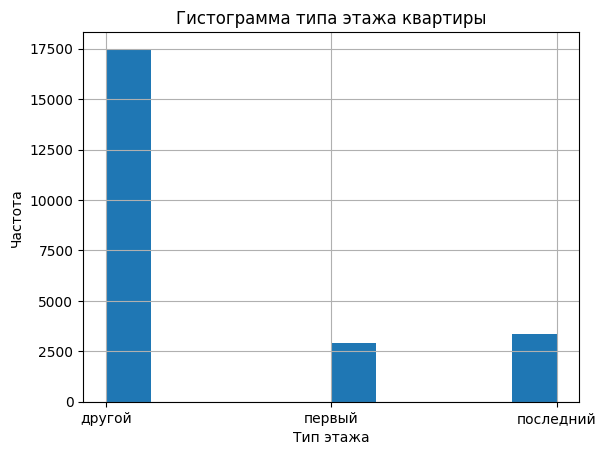

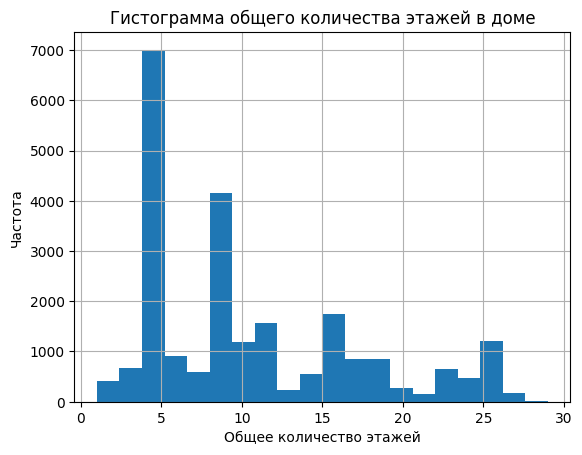

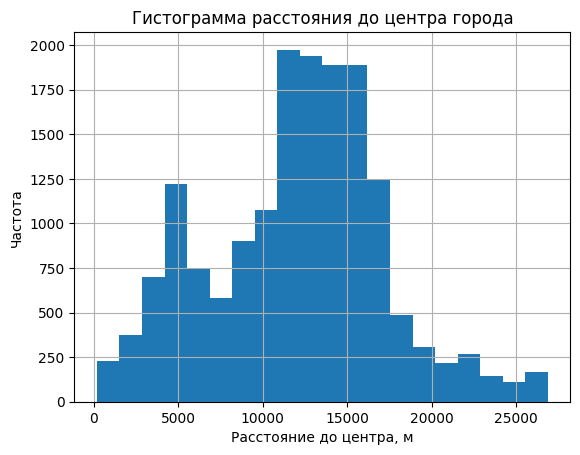

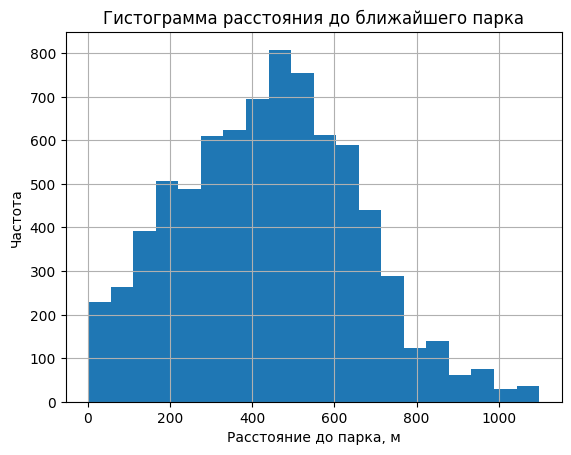

In [ ]:
# Построение гистограмм для каждого параметра
data['total_area'].hist(bins=20)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

data['living_area'].hist(bins=20)
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

data['kitchen_area'].hist(bins=20)
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Частота')
plt.show()

data['last_price'].hist(bins=20)
plt.title('Гистограмма цены объекта')
plt.xlabel('Цена объекта, млн руб')
plt.ylabel('Частота')
plt.show()

data['rooms'].hist(bins=10)
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

data['ceiling_height'].hist(bins=10)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()

data['floor_type'].hist()
plt.title('Гистограмма типа этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Частота')
plt.show()

data['floors_total'].hist(bins=20)
plt.title('Гистограмма общего количества этажей в доме')
plt.xlabel('Общее количество этажей')
plt.ylabel('Частота')
plt.show()

data['cityCenters_nearest'].hist(bins=20)
plt.title('Гистограмма расстояния до центра города')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Частота')
plt.show()

data['parks_nearest'].hist(bins=20)
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Частота')
plt.show()

На основе данных и построенных гистограмм можно сделать следующие наблюдения по каждому из параметров:

1. Площадь квартиры:
- Большинство квартир имеют площадь от 30 до 60 квадратных метров, что свидетельствует о распространенности таких площадей в представленном наборе данных.
- Наблюдается несколько выбивающихся значений с очень большой площадью, что может быть связано с наличием роскошных или необычных объектов недвижимости.

2. Цена квартиры:
- Большинство квартир имеют цену до 10 млн рублей.
- На гистограмме видны выбивающиеся значения с очень высокой ценой, скорее всего, это предложения премиум-класса.

3. Число комнат:
- Самым распространенным числом комнат является 1-2 комнаты, что типично для квартир малогабаритного типа.
- Есть небольшое количество квартир с 3-4 комнатами.

4. Высота потолков:
- Большинство квартир имеют потолки стандартной высоты (2.5-2.7 м), что является распространенным стандартом для жилой недвижимости.
- Есть несколько значений с очень высокими потолками, что может указывать на присутствие объектов премиального класса.

5. Тип этажа квартиры:
- Большинство квартир находятся на "другом" этаже, что означает, что они не являются ни первым, ни последним этажом.
- Количество квартир на первом и последнем этажах сопоставимо, что может указывать на разнообразие предложений на рынке.

6. Общее количество этажей в доме:
- Встречаются как многоэтажные дома (до 5-9 этажей), так и высокие здания (более 9 этажей).
- Есть отдельные объекты с очень большим количеством этажей, что может указывать на наличие небоскребов или многоэтажных жилых комплексов.

7. Расстояние до центра города:
- Большинство квартир находятся на расстоянии от 5 до 15 км от центра города.
- На гистограмме видны выбивающиеся значения ближе к центру, что может указывать на популярность недвижимости в центре города.

8. Расстояние до ближайшего парка:
- Распределение расстояния до ближайшего парка широкое, от нескольких метров до нескольких километров.
- Большинство квартир находятся на расстоянии до 1 км от ближайшего парка.

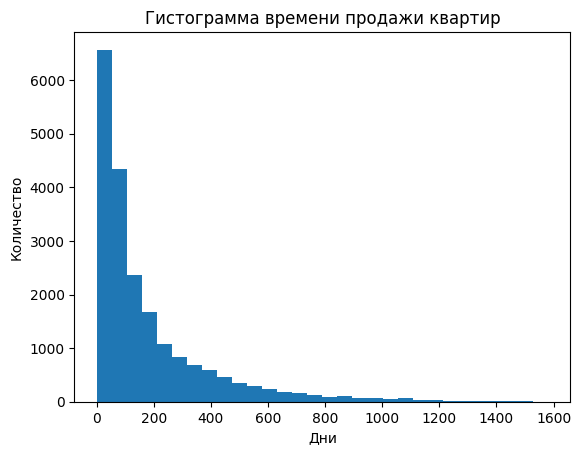

In [ ]:
# Построение гистограммы времени продажи квартир
import matplotlib.pyplot as plt
data['days_exposition'].plot(kind='hist', bins=30, title='Гистограмма времени продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.show()

In [ ]:
# Вычисление квартилей для столбца 'days_exposition'
lower_quantile = data['days_exposition'].quantile(0.25)
upper_quantile = data['days_exposition'].quantile(0.75)

# Определение быстрых и долгих продаж
fast_sales = lower_quantile.round()
long_sales = upper_quantile.round()

# Расчет медианного значения времени продажи квартиры
median_sales = data['days_exposition'].median()

In [ ]:
f'Быстрая продажа: {fast_sales} дней'

'Быстрая продажа: 45.0 дней'

In [ ]:
f'Долгая продажа: {long_sales} дней'

'Долгая продажа: 232.0 дней'

In [ ]:
f'Медианное значение времени продажи: {median_sales} дней'

'Медианное значение времени продажи: 95.0 дней'

Обычно продажа квартиры занимает около 95 дней. Если продажа занимает менее 45 дней, то такие случаи можно считать быстрыми. Продажи, которые продолжаются более 232 дней - считаются долгими.

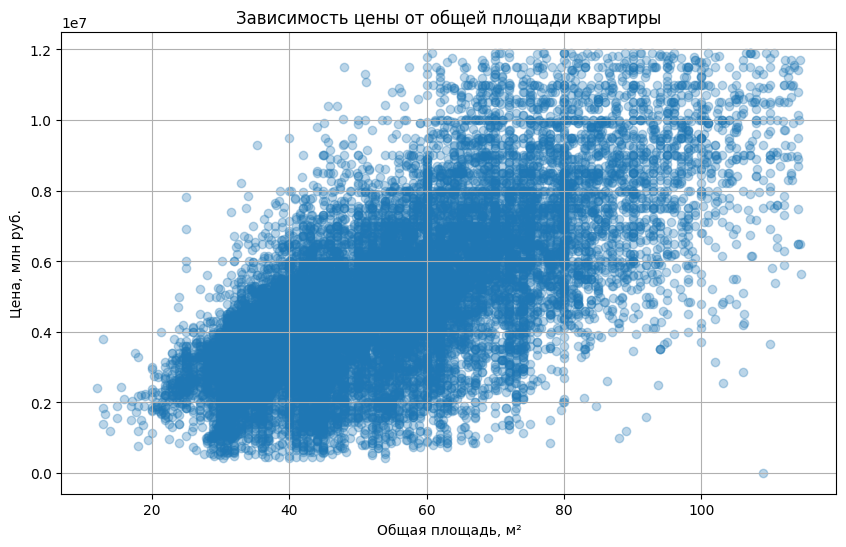

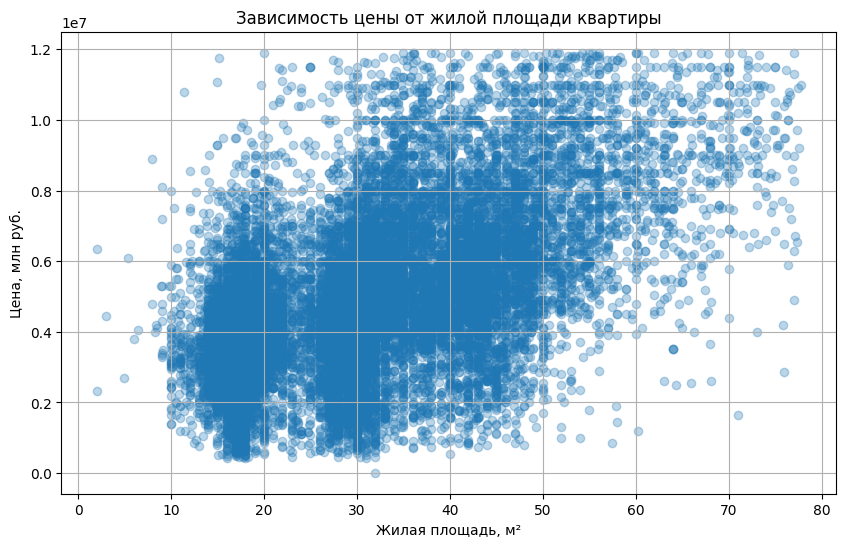

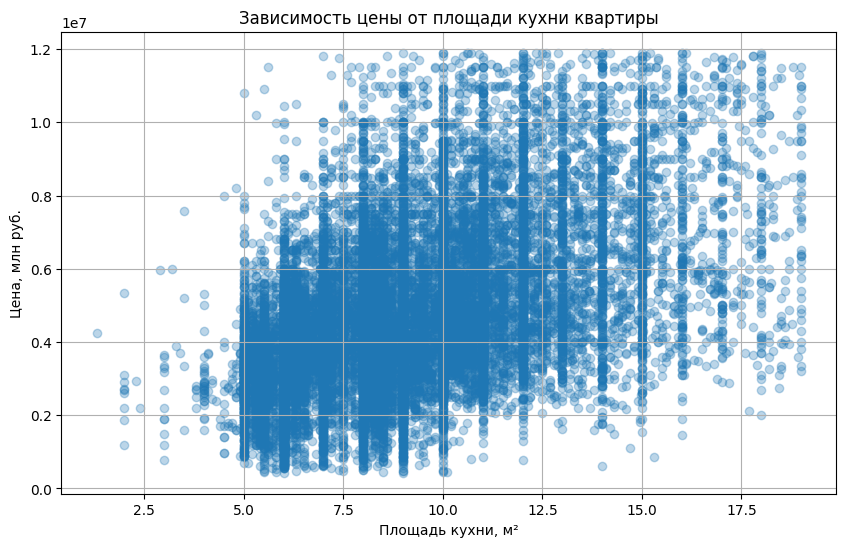

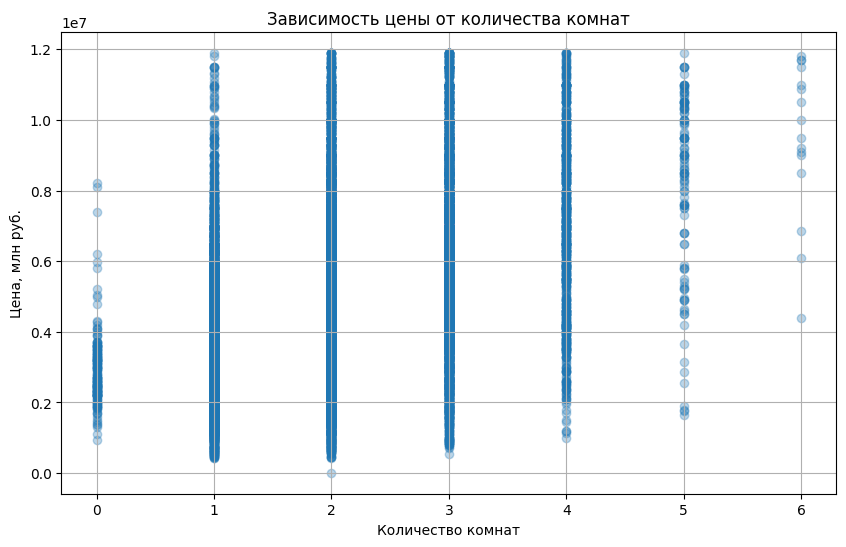

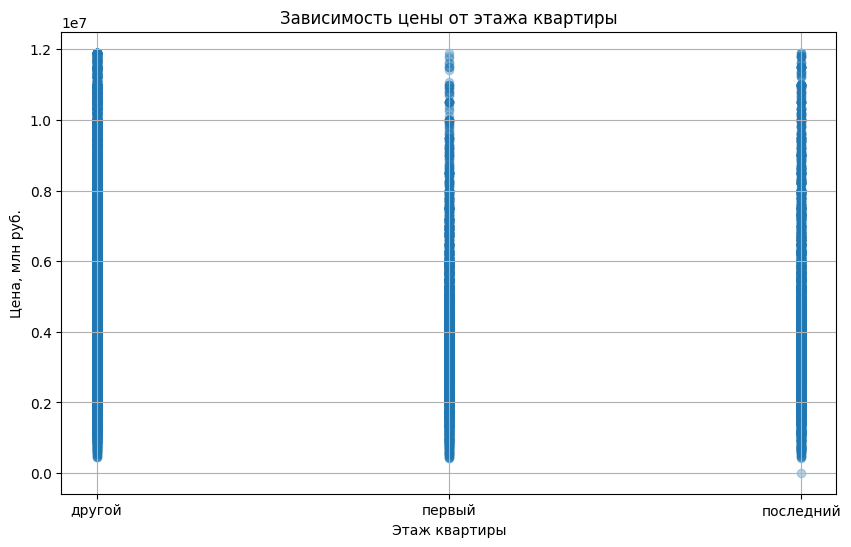

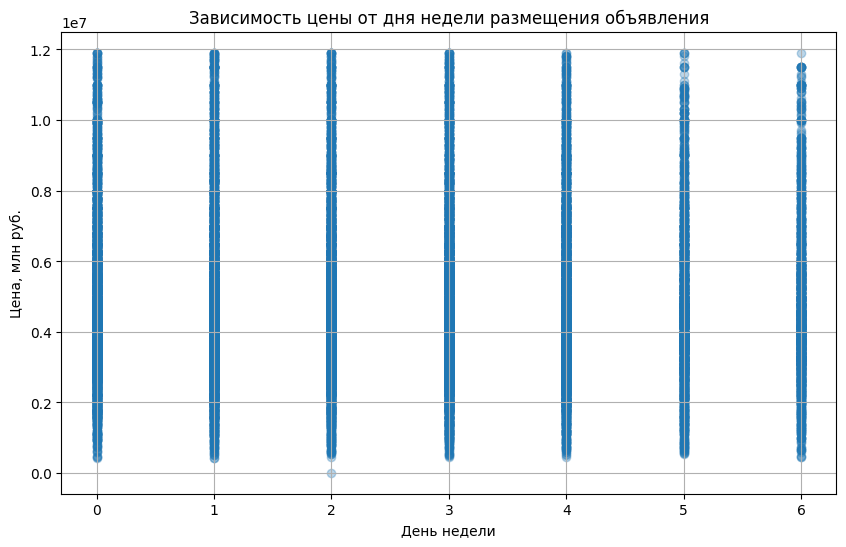

In [ ]:
# График зависимости цены от общей площади
plt.figure(figsize=(10, 6))
plt.scatter(data['total_area'], data['last_price'], alpha=0.3)
plt.title('Зависимость цены от общей площади квартиры')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Цена, млн руб.')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['living_area'], data['last_price'], alpha=0.3)
plt.title('Зависимость цены от жилой площади квартиры')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Цена, млн руб.')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['kitchen_area'], data['last_price'], alpha=0.3)
plt.title('Зависимость цены от площади кухни квартиры')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Цена, млн руб.')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['rooms'], data['last_price'], alpha=0.3)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, млн руб.')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['floor_type'], data['last_price'], alpha=0.3)
plt.title('Зависимость цены от этажа квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Цена, млн руб.')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['weekday_exposition'], data['last_price'], alpha=0.3)
plt.title('Зависимость цены от дня недели размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Цена, млн руб.')
plt.grid(True)
plt.show()

Наиболее влиятельные параметры на цену: Из анализа видно, что цена недвижимости коррелирует с такими параметрами, как площадь квартиры, количество комнат. При этом более дорогие квартиры обычно имеют большую площадь и количество комнат.

Влияние этажа: Проведенный анализ показал, что цена квартиры может зависеть от этажа, на котором она расположена. Например, квартиры на первом и последнем этаже могут иметь отличную цену от квартир на других этажах.

Временная зависимость цены: Из графика зависимости цены от дня недели размещения объявления можно заметить, что цена квартир может варьироваться в зависимости от дня недели.

In [ ]:
# Определение 10 населенных пунктов с наибольшим числом объявлений
top_locality = data['locality_name'].value_counts().head(10)
top_locality

,count
locality_name,
Санкт-Петербург,15721
поселок Мурино,556
поселок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
поселок Парголово,327
Гатчина,307
деревня Кудрово,299


In [ ]:
# Рассчет средней цены за квадратный метр для каждого населенного пункта
mean_price_square = data.groupby('locality_name').agg({'last_price': 'sum', 'total_area': 'sum', 'square_price': 'mean'})
top_locality_mean_price = mean_price_square.loc[top_locality.index]
top_locality_mean_price[['last_price', 'total_area', 'square_price']]

,last_price,total_area,square_price
locality_name,,,
Санкт-Петербург,7.811182e+10,823991.31,114849.008793
поселок Мурино,2.030713e+09,24442.54,85681.762572
поселок Шушары,1.807556e+09,23317.56,78677.364318
Всеволожск,1.483636e+09,21893.83,68654.473970
Пушкин,1.814922e+09,18919.38,103125.819377
Колпино,1.290189e+09,17517.74,75424.579112
поселок Парголово,1.467600e+09,16646.00,90175.913089
Гатчина,1.044319e+09,15212.68,68746.146515
деревня Кудрово,1.253013e+09,13808.35,92473.547559


In [ ]:
# Выделение населенных пунктов с самой высокой и низкой стоимостью квадратного метра
high_price_locality = top_locality_mean_price['square_price'].idxmax()
low_price_locality = top_locality_mean_price['square_price'].idxmin()

In [ ]:
f'Населенный пункт с самой высокой ценой за квадратный метр: {high_price_locality}'

'Населенный пункт с самой высокой ценой за квадратный метр: Санкт-Петербург'

In [ ]:
f'Населенный пункт с самой низкой ценой за квадратный метр: {low_price_locality}'

'Населенный пункт с самой низкой ценой за квадратный метр: Выборг'

In [ ]:
# Отфильтровка квартир в Санкт-Петербурге
spb_data = data[data['locality_name'] == 'Санкт-Петербург']

In [ ]:
# Группировка данных по расстоянию до центра и вычисление средней цены
mean_price_km = spb_data.groupby('cityCenters_km')['last_price'].mean()

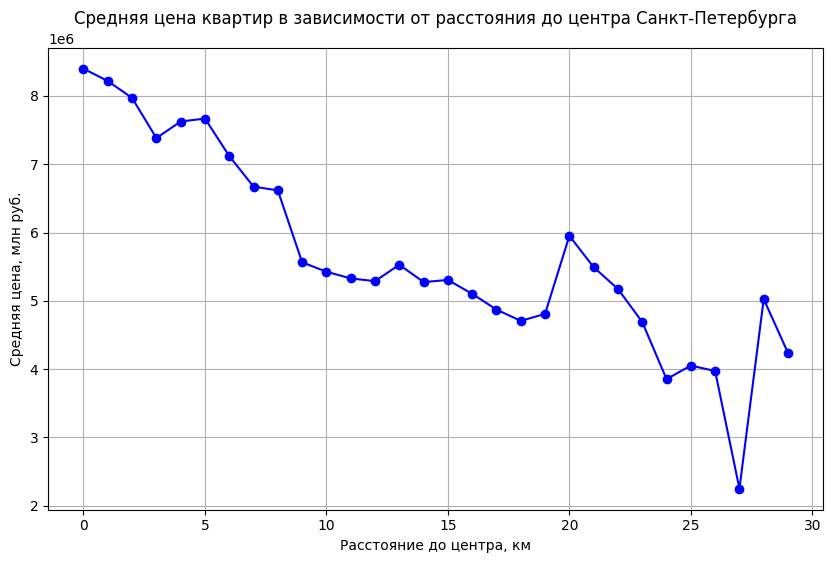

In [ ]:
# Построение графика цены квартир в зависимости от расстояния до центра Санкт-Петербурга
plt.figure(figsize=(10, 6))
plt.plot(mean_price_km, marker='o', color='b')
plt.title('Средняя цена квартир в зависимости от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена, млн руб.')
plt.grid(True)
plt.show()

График изменения средней цены по расстоянию до центра показывает, что цены могут колебаться в зависимости от удаленности квартиры от центра. Чем ближе к центру, тем цены выше, а дальше от центра - они снижатся.

### Напишите общий вывод

**Пропуски данных**
Заменены на медианное значение (в большинстве столбцов).
В столбцах 'is_apartment' и 'balcony' заменены на 'False' и '0' соответственно.
Тип данных в некоторых столбцах был изменен на более подходящий.

**Наблюдения**
Площадь: Распространены квартиры 30-60 м². Есть выбросы с очень большой площадью.
Цена: Большинство квартир до 10 млн. рублей. Есть выбросы с высокой ценой.
Число комнат: 1-2 комнаты - самые распространенные.
Высота потолков: 2.5-2.7 м - стандарт. Есть выбросы с высокими потолками.
Тип этажа: "Другой" - самый распространенный. Количество квартир на 1 и последнем этажах сопоставимо.
Этажность: Встречаются как многоэтажные дома, так и высотки.
Расстояние до центра: 5-15 км - наиболее распространенное. Есть выбросы ближе к центру.
Расстояние до парка: До 1 км - наиболее распространенное.
Время продажи: В среднем 95 дней. Продажи < 45 дней - быстрые, > 232 дней - долгие.

**Влиятельные факторы на цену**
Площадь: Больше площадь - выше цена.
Количество комнат: Больше комнат - выше цена.
Этаж: Может влиять (например, 1 и последний этаж).
День недели размещения: Цена может меняться.
Населенный пункт: Санкт-Петербург - самый дорогой, Выборг - самый дешевый.
Удаленность от центра: Чем ближе, тем дороже.

**Выводы**
На рынке представлены квартиры различной площади, цены, количества комнат, этажности и т.д.
Цена зависит от многих факторов, в том числе от площади, количества комнат, этажа, дня недели размещения и удаленности от центра.
Быстрая продажа (< 45 дней) может быть выгодной для продавца.
Санкт-Петербург - самый дорогой город, Выборг - самый дешевый.